In [26]:
import pandas as pd
import seaborn as sns

# Bug Fix Benchmark Analysis

In [27]:
# Replace with the location of your result files.
DECOMPOSITION_PERFORMANCE_PATH='decompositions-100.csv'
METRICS_PATH='metrics-100.csv'

## Performance

In [28]:
df_performance = pd.read_csv(DECOMPOSITION_PERFORMANCE_PATH, names=['project', 'bug_id', 'smartcommit_rand_index',
                                                                    'flexeme_rand_index'])
df_performance.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index
0,Cli,1,0.518012,0.481652
1,Cli,20,0.862434,0.223228
2,Cli,27,0.650316,0.451717
3,Cli,9,0.762483,0.272232
4,Closure,102,0.590726,0.475936


In [29]:
df_performance.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index
count,97.000000,97.000000,97.000000
mean,42.927835,0.726279,0.551056
std,36.188525,0.185023,0.190283
min,1.000000,0.208999,0.223228
25%,13.000000,0.571429,0.448476
50%,35.000000,0.707006,0.511719
75%,60.000000,0.884146,0.571429
max,166.000000,1.000000,1.000000


In [30]:
df_performance.groupby(['project']).agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median'})

,bug_id,smartcommit_rand_index,flexeme_rand_index
project,,,
Cli,4,0.706399,0.361975
Closure,20,0.636995,0.525416
Codec,1,0.762846,0.571429
Compress,8,1.000000,0.541804
Csv,3,0.752381,0.807882
Gson,3,0.567150,0.529221
JacksonCore,2,0.537058,0.561415
JacksonDatabind,13,0.665493,0.485671
JacksonXml,1,0.721088,0.448476


In [31]:
df_performance.agg({'bug_id':'count', 'smartcommit_rand_index':'median',
                                         'flexeme_rand_index':'median'})

bug_id                    97.000000
smartcommit_rand_index     0.707006
flexeme_rand_index         0.511719
dtype: float64

In [32]:
df_perf_melted = pd.melt(df_performance, id_vars=['project', 'bug_id'])
df_perf_melted.head()

,project,bug_id,variable,value
0,Cli,1,smartcommit_rand_index,0.518012
1,Cli,20,smartcommit_rand_index,0.862434
2,Cli,27,smartcommit_rand_index,0.650316
3,Cli,9,smartcommit_rand_index,0.762483
4,Closure,102,smartcommit_rand_index,0.590726


### Statistical Significance and Effect Size

In [33]:
# Please use the RQ1.R instead of the code below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

# model = smf.mixedlm(formula='value ~ variable', data=df_perf_melted, groups=df_perf_melted['project'])
# result = model.fit()
# result.summary()

## Metrics

In [34]:
df_metrics = pd.read_csv(METRICS_PATH, names=['project', 'bug_id', 'files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
df_metrics.head()

,project,bug_id,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Cli,14,2,1,4,19.750000,79
1,Cli,1,3,1,19,8.473684,161
2,Cli,20,2,1,5,5.600000,28
3,Cli,27,4,0,9,9.333333,84
4,Cli,9,3,2,5,7.800000,39


# Correlation between perfromance and metrics

In [35]:
df = pd.merge(df_performance, df_metrics,  how='left', on=['project','bug_id'])
df.head()

,project,bug_id,smartcommit_rand_index,flexeme_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
0,Cli,1,0.518012,0.481652,3.0,1.0,19.0,8.473684,161.0
1,Cli,20,0.862434,0.223228,2.0,1.0,5.0,5.600000,28.0
2,Cli,27,0.650316,0.451717,4.0,0.0,9.0,9.333333,84.0
3,Cli,9,0.762483,0.272232,3.0,2.0,5.0,7.800000,39.0
4,Closure,102,0.590726,0.475936,4.0,1.0,7.0,4.571429,32.0


In [36]:
df.describe()

,bug_id,smartcommit_rand_index,flexeme_rand_index,files_updated,test_files_updated,hunks,average_hunk_size,lines_updated
count,97.000000,97.000000,97.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,42.927835,0.726279,0.551056,3.900000,1.214286,10.700000,6.643301,64.785714
std,36.188525,0.185023,0.190283,3.799886,0.915136,14.414516,3.543047,71.829890
min,1.000000,0.208999,0.223228,2.000000,0.000000,2.000000,1.500000,6.000000
25%,13.000000,0.571429,0.448476,2.000000,1.000000,4.000000,4.437500,23.250000
50%,35.000000,0.707006,0.511719,3.000000,1.000000,6.000000,5.866071,40.000000
75%,60.000000,0.884146,0.571429,4.000000,1.000000,9.000000,8.107143,73.000000
max,166.000000,1.000000,1.000000,32.000000,6.000000,87.000000,25.000000,396.000000


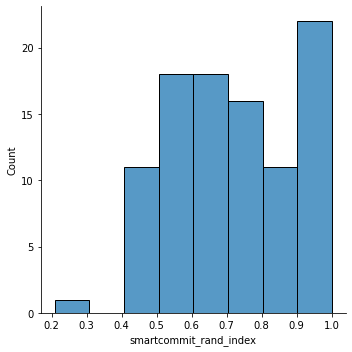

In [37]:
sns.displot(df, x="smartcommit_rand_index")

[Text(0.5, 1.0, 'Performance vs Lines')]

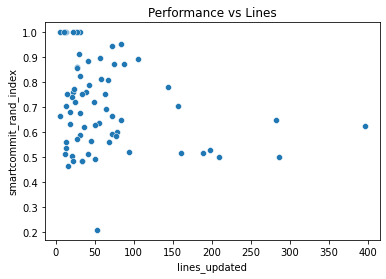

In [38]:
sns.scatterplot(df, x="lines_updated", y="smartcommit_rand_index").set(title="Performance vs Lines")

[Text(0.5, 1.0, 'Performance vs Files')]

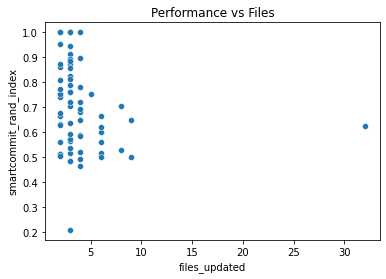

In [39]:
sns.scatterplot(df, x="files_updated", y="smartcommit_rand_index").set(title="Performance vs Files")

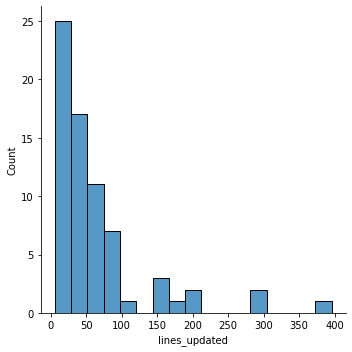

In [40]:
sns.displot(df, x="lines_updated")

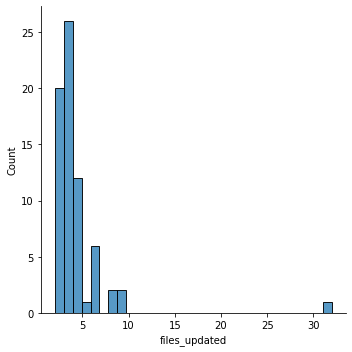

In [41]:
sns.displot(df, x="files_updated")

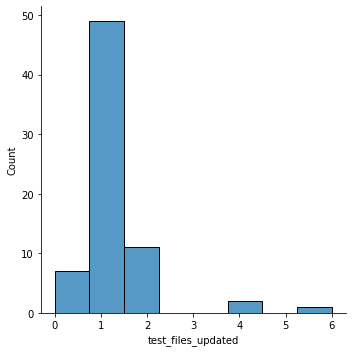

In [42]:
sns.displot(df, x="test_files_updated")

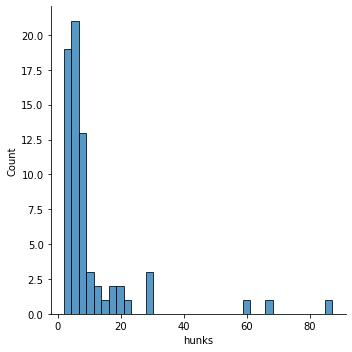

In [43]:
sns.displot(df, x="hunks")

<AxesSubplot: >

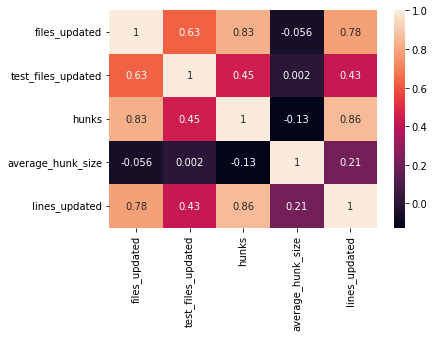

In [44]:
features = list(['files_updated', 'test_files_updated', 'hunks', 'average_hunk_size', 'lines_updated'])
correlation_matrix = df[features].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

In [45]:
df_time = pd.read_csv("../out/time.csv", names=['project', 'bug_id', 'tool', 'time'])
df_time.head()

FileNotFoundError: [Errno 2] No such file or directory: '../out/time.csv'

In [ ]:
df_time.groupby('tool').mean()

In [ ]:
df.describe()

In [ ]:
df.groupby('project')['project'].count()

## Statistical Significance and Effect Size

In [ ]:
df.to_csv('merge-100.csv', index=False)
# Please use the RQ2.R instead of the code cell below.
# smf doesn't support multiple random effects and we have to random effects due to bug id and project.

In [ ]:
# formula = 'smartcommit_rand_index ~ files_updated+test_files_updated+hunks+average_hunk_size+lines_updated'
# model = smf.mixedlm(formula = formula, data=df, groups=df['project'])
# result = model.fit()
# # pd.options.display.max_rows = 4000
#
# result.summary()

### Tisane test (WIP)

In [ ]:
import tisane as ts
import pandas as pd

## Load data
df = pd.read_csv("./exercise_simple.csv")

## Declare observed variables
# The researchers observe participants/cases (observational unit).
pid = ts.Unit("case", cardinality=245) # pid is an observational unit. There are 245 adults.

# Each pid (cause/adult) has an age measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable age.
# Note: By default, number_of_instances equals 1. The parameter value is explicitly set below for clarity.
age = pid.numeric("age", number_of_instances=1)  # participant age

# Each pid has an exercise measure, which is numeric .
# Verbose: Each instance of pid has one instance of a numeric variable exercise.
exercise = pid.numeric("exercise")  # years of vigorous physical exercise

# Each pid has an endurance measure, which is numeric.
# Verbose: Each instance of pid has one instance of a numeric variable endurance.
endurance = pid.numeric("endurance") # number of minutes of sustained jogging on a treadmill

## Declare conceptual relationships between the observed variables
exercise.causes(endurance)
age.associates_with(endurance)

## Query relatioships to infer a statistical model and generate a script
# Author query by partially authoring a statistical model as a Design
design = ts.Design(dv=endurance, ivs=[age, exercise]).assign_data(df)
ts.infer_statistical_model_from_design(design=design)